In [112]:
import numpy as np

X = np.load('X.npy')
Y = np.load('Y.npy')

In [113]:
print(len(X))
print(X.shape)

2062
(2062, 64, 64)


In [114]:
print(len(Y))
print(Y.shape)

2062
(2062, 10)


**이 데이터는 64 x 64의 손모양 데이터**<br>
분류 목적은 어느 숫자를 가리키는지를 분류하기 위함이다

In [115]:
from sklearn.model_selection import train_test_split

seed = 3

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

(-0.5, 63.5, 63.5, -0.5)

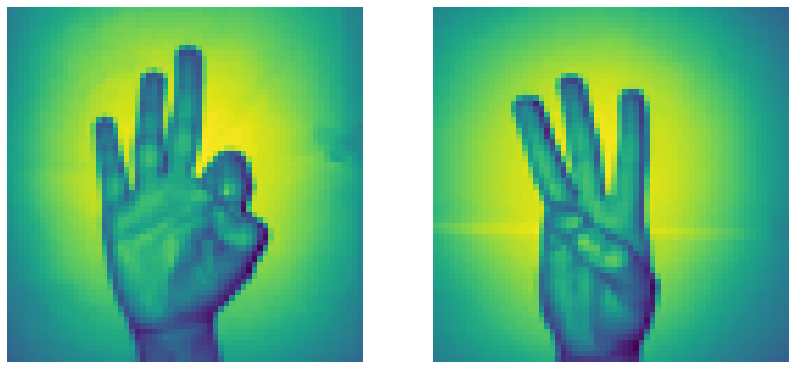

In [116]:
plt.subplot(1,2,1)
plt.imshow(X[200])#.reshape(img_size,img_size))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(X[800])#.reshape(img_size,img_size))
plt.axis('off')

## DNN

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
# 선형 layer 모델 -> 층별로 layer를 쌓는다고 생각하면 됨!
model = Sequential([
  Flatten(input_shape=(64, 64)),
  Dense(256, activation='relu'),#2D Layer
  Dropout(0.2),
  Dense(256, activation='relu'),
  Dense(10, activation='softmax')
])

In [6]:
model.compile(optimizer='adam',#정규화기
              loss='categorical_crossentropy', #손실함수
              metrics=['accuracy']) #기준리스트

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1048832   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 1,117,194
Trainable params: 1,117,194
Non-trainable params: 0
_________________________________________________________________


In [7]:
print(Y_test.shape) # One-Hot encoding!

(619, 10)


In [8]:
# Train and evaluate model:
model.fit(X_train, Y_train, epochs=5,batch_size = 8)
model.evaluate(X_test, Y_test)

Epoch 1/5
181/181 [==============================] - 1s 4ms/step - loss: 2.9883 - accuracy: 0.1324
Epoch 2/5
181/181 [==============================] - 1s 4ms/step - loss: 2.3030 - accuracy: 0.1049
Epoch 3/5
181/181 [==============================] - 1s 4ms/step - loss: 2.3028 - accuracy: 0.0964
Epoch 4/5
181/181 [==============================] - 1s 4ms/step - loss: 2.3039 - accuracy: 0.1007
Epoch 5/5
20/20 [==============================] - 0s 2ms/step - loss: 2.3064 - accuracy: 0.0808


[2.3063511848449707, 0.08077544718980789]

In [9]:
# 모델을 설정합니다.
model_1 = Sequential()
model_1.add(Flatten(input_shape=(64, 64)))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(16, activation='relu'))
model_1.add(Dense(10, activation='softmax'))

In [10]:
model_1.compile(optimizer='adam',#정규화기
              loss='categorical_crossentropy', #손실함수
              metrics=['accuracy']) #기준리스트

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                262208    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                170       
Total params: 264,986
Trainable params: 264,986
Non-trainable params: 0
________________________________________________

In [11]:
# Train and evaluate model:
model_1.fit(X_train, Y_train, epochs=5,batch_size = 8)
model_1.evaluate(X_test, Y_test)

Epoch 1/5
181/181 [==============================] - 1s 2ms/step - loss: 2.4415 - accuracy: 0.1074
Epoch 2/5
181/181 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1042
Epoch 3/5
181/181 [==============================] - 0s 2ms/step - loss: 2.3028 - accuracy: 0.1034
Epoch 4/5
181/181 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1057
Epoch 5/5
20/20 [==============================] - 0s 1ms/step - loss: 2.3051 - accuracy: 0.0808


[2.3051376342773438, 0.08077544718980789]

## CNN

In [117]:
print(type(X_train))
train_img = X_train.reshape((-1,64,64,1))
test_img = X_test.reshape((-1,64,64,1))
print(train_img.shape)
print(test_img.shape)

<class 'numpy.ndarray'>
(1443, 64, 64, 1)
(619, 64, 64, 1)


In [118]:
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import *

CNN_input = Input(shape = (64,64,1))
CNN = Conv2D(128,(3,3),activation='relu')(CNN_input) #82개의 3x3 matrix filters
CNN = MaxPool2D((2,2))(CNN) #2x2 size의 Max Pooling 2D Matrix
CNN = Dropout(0.2)(CNN) #0.2%의 확률로 dropout
CNN = Conv2D(256,(3,3),activation='relu')(CNN) # 전 단계 필터 수의 2배인 164개의 3x3 matrix filters
CNN = MaxPool2D((2,2))(CNN) #2x2 size의 Max Pooling 2D Matrix
CNN = Dropout(0.3)(CNN) #0.3%의 확률로 dropout
CNN = Flatten()(CNN) #dropout했을 때의 차원과 filter 개수를 곱해서 쭉 늘임
CNN = Dense(10,activation='softmax')(CNN)
CNN_model = Model(CNN_input,CNN)
CNN_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64, 64, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 128)       1280      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 128)       0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 256)       295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 256)       0   

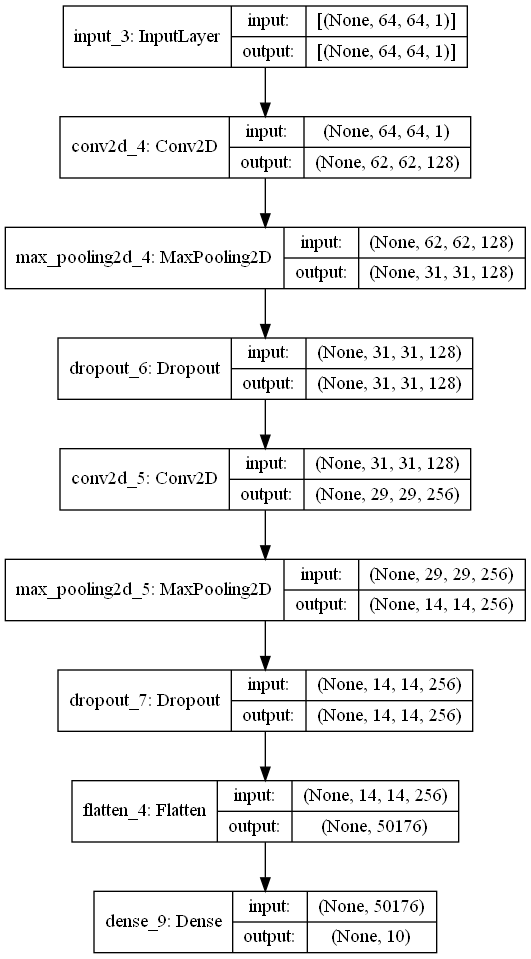

In [119]:
tf.keras.utils.plot_model(CNN_model, show_shapes=True)

In [ ]:
CNN_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#CNN_model.fit(train_img,y_train,batch_size=1 ,epochs=5) #training 소요시간: 5분 6초 5밀리초
history = CNN_model.fit(train_img,Y_train, epochs=50, batch_size = 16) #-> 기본으로 batch_size = 32로 세팅 #training 소요시간: 2분 53초 92밀리초 -> 1/2

Epoch 1/50
91/91 [==============================] - 16s 172ms/step - loss: 2.2237 - accuracy: 0.1664
Epoch 2/50
91/91 [==============================] - 16s 176ms/step - loss: 0.9613 - accuracy: 0.7144
Epoch 3/50
91/91 [==============================] - 16s 173ms/step - loss: 0.6645 - accuracy: 0.7836
Epoch 4/50
91/91 [==============================] - 16s 173ms/step - loss: 0.5689 - accuracy: 0.8220
Epoch 5/50
91/91 [==============================] - 16s 170ms/step - loss: 0.5237 - accuracy: 0.8321
Epoch 6/50
91/91 [==============================] - 16s 172ms/step - loss: 0.5121 - accuracy: 0.8494
Epoch 7/50
91/91 [==============================] - 16s 171ms/step - loss: 0.4359 - accuracy: 0.8656
Epoch 8/50
91/91 [==============================] - 16s 171ms/step - loss: 0.3595 - accuracy: 0.8968
Epoch 9/50
91/91 [==============================] - 15s 170ms/step - loss: 0.3280 - accuracy: 0.8933
Epoch 10/50
91/91 [==============================] - 16s 171ms/step - loss: 0.2658 - accura

In [ ]:
CNN_model.evaluate(test_img, Y_test,verbose=2)

In [ ]:
import matplotlib.pyplot as plt

def plot_metrics(history):
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    plt.rcParams["figure.figsize"] = (14,10)
    metrics =  ['loss', 'accuracy']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
#         plt.plot(history.epoch, history.history['val_'+metric],
#              color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.8,1])
        else:
            plt.ylim([0,1])

        plt.legend()


In [ ]:
plot_metrics(history)